# FINAL PROJECTS 4

## 1. Introduction

**Kelompok 2:**
<ol>
    <li>Mohammad Arkan - PYTN-KS16-09</li>
    <li>Jonathan Calvin Limawal - PYTN-KS16-019</li>
    <li>Desi Suci Nopianti - PYTN-KS16-025</li>
</ol>

## Project Overview
































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































Dataset yang digunakan pada projek ini adalah dataset publik yang tersedia di-*website* Kaggle (https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

Keberadaan kartu kredit sudah dikenal sejak lama, namun model transaksi keuangan saat ini membuat kartu kredit menjadi jauh lebih berguna dan nyaman. Tapi apa sebenarnya kartu kredit itu? Secara sederhana, kartu kredit diartikan sebagai alat pembayaran berupa kartu yang biaya pembayarannya dalam suatu transaksi keuangan ditanggung terlebih dahulu oleh penerbit kartu. Setelah itu, pemegang kartu kredit wajib melunasi hutang pembayaran kartu tepat waktu yang telah disepakati sebelumnya. Kartu kredit berbeda dari kartu debit uang asli nasabah, sehingga kartu kredit dapat menawarkan manfaat unik bagi orang yang menggunakannya. Namun, dalam banyak hal, kartu kredit tidak berbeda dengan kartu debit.Perbedaannya hanya pada modal yang digunakan. Dana kartu kredit adalah saldo terutang yang dibatasi hingga jumlah tertentu.

Dataset yang akan digunakan berisi perilaku penggunaan sekitar 9000 pengguna kartu kredit selama enam bulan terakhir. Diperlukan pengelompokan nasabah kartu kredit ke dalam beberapa kelompok sesuai dengan perilaku nasabah untuk mendapatkan strategi pemasaran kartu kredit yang efektif dan efisien. Model yang digunakan pada project ini adalah model clustering K-Means, DBSCAN, dan K-Medoids.

<b>Tahapan:</b>
    
<ol>
    <li>Melakukan eksplorasi dataset menggunakan berbagai jenis visualisasi data.</li>
    <li>Melakukan preprocessing data sebelum menggunakan model.</li>
    <li>Mengelompokkan pelanggan ke dalam beberapa cluster dengan menggunakan berbagai model clustering.</li>
    <li>Melakukan interpretasi dan analisis terhadap kelompok-kelompok (profiling) yang telah dibuat.</li>
    <li>Memberikan saran pemasaran berdasarkan hasil profiling dan analisis yang dilakukan.</li>
</ol>


<b>Attribute Information:</b>

<ol>
    <li>CUSTID - Identification of Credit Card holder (Categorical)</li>
    <li>BALANCE - Balance amount left in their account to make purchases</li>
    <li>BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)</li>
    <li>PURCHASES - Amount of purchases made from account</li>
    <li>ONEOFFPURCHASES - Maximum purchase amount done in one-go</li>
    <li>INSTALLMENTSPURCHASES - Amount of purchase done in installment</li>
    <li>CASHADVANCE - Cash in advance given by the user</li>
    <li>PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)</li>
    <li>ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)</li>
    <li>PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)</li>
    <li>CASHADVANCEFREQUENCY - How frequently the cash in advance being paid</li>
    <li>CASHADVANCETRX - Number of Transactions made with "Cash in Advance"</li>
    <li>PURCHASESTRX - Number of purchase transactions made</li>
    <li>CREDITLIMIT - Limit of Credit Card for user</li>
    <li>PAYMENTS - Amount of Payment done by user</li>
    <li>MINIMUM_PAYMENTS - Minimum amount of payments made by user</li>
    <li>PRCFULLPAYMENT - Percent of full payment paid by user</li>
    <li>TENURE - Tenure of credit card service for user</li>
</ol>

<b>Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:</b>
    
<ol>
    <li>Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn</li>
    <li>Mampu mempersiapkan data untuk digunakan dalam Clustering</li>
    <li>Mampu mengimplementasikan Clustering pada data yang diberikan</li>
</ol>

## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from math import isnan
from random import sample
from sklearn import metrics
from matplotlib import patches
from numpy.random import uniform
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

## 3. Data Loading

In [2]:
# Mengantisipasi untuk unstandard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN', ' ', ' - ']
# Membaca dataset
generalCC_df = pd.read_csv('CC GENERAL.csv', na_values=missing_values)

# Menampilkan tampilan kolom full
pd.set_option('display.max_columns', 500)

# Menampilkan Datasett
generalCC_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Menghitung jumlah baris dan kolom
rows, columns = generalCC_df.shape
print('Dataset ini terdapat: ')
# Menampilkan jumlah baris
print(rows, "Rows")
# Menampilkan jumlah kolom
print(columns, "Columns")

Dataset ini terdapat: 
8950 Rows
18 Columns


In [4]:
# Melihat attribut yang ada pada dataset
generalCC_df.columns.values

array(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype=object)

In [5]:
# Melihat statistik deskriptif dari data
generalCC_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [6]:
# Melihat informasi tentang dataset
generalCC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Cek missing value
generalCC_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Cek duplikat ata
generalCC_df.duplicated().sum()

0

Terdapat missing value pada fitur CREDIT_LIMIT dan MINIMUM_PAYMENTS.Ini akan dibersihkan di tahap selanjutnya. Dataset ini tidak memiliki data yang duplikat.

## 4. Data Cleaning

In [9]:
# handle missing value dengan mean
col = ['CREDIT_LIMIT','MINIMUM_PAYMENTS']

# handle missing value dengan SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
generalCC_df[col] = imputer.fit_transform(generalCC_df[col])

In [10]:
# Cek missing value
generalCC_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
# Drop CUST_ID karna tidak berpengaruh pada proses clustering
generalCC_df.drop('CUST_ID', axis=1, inplace=True)

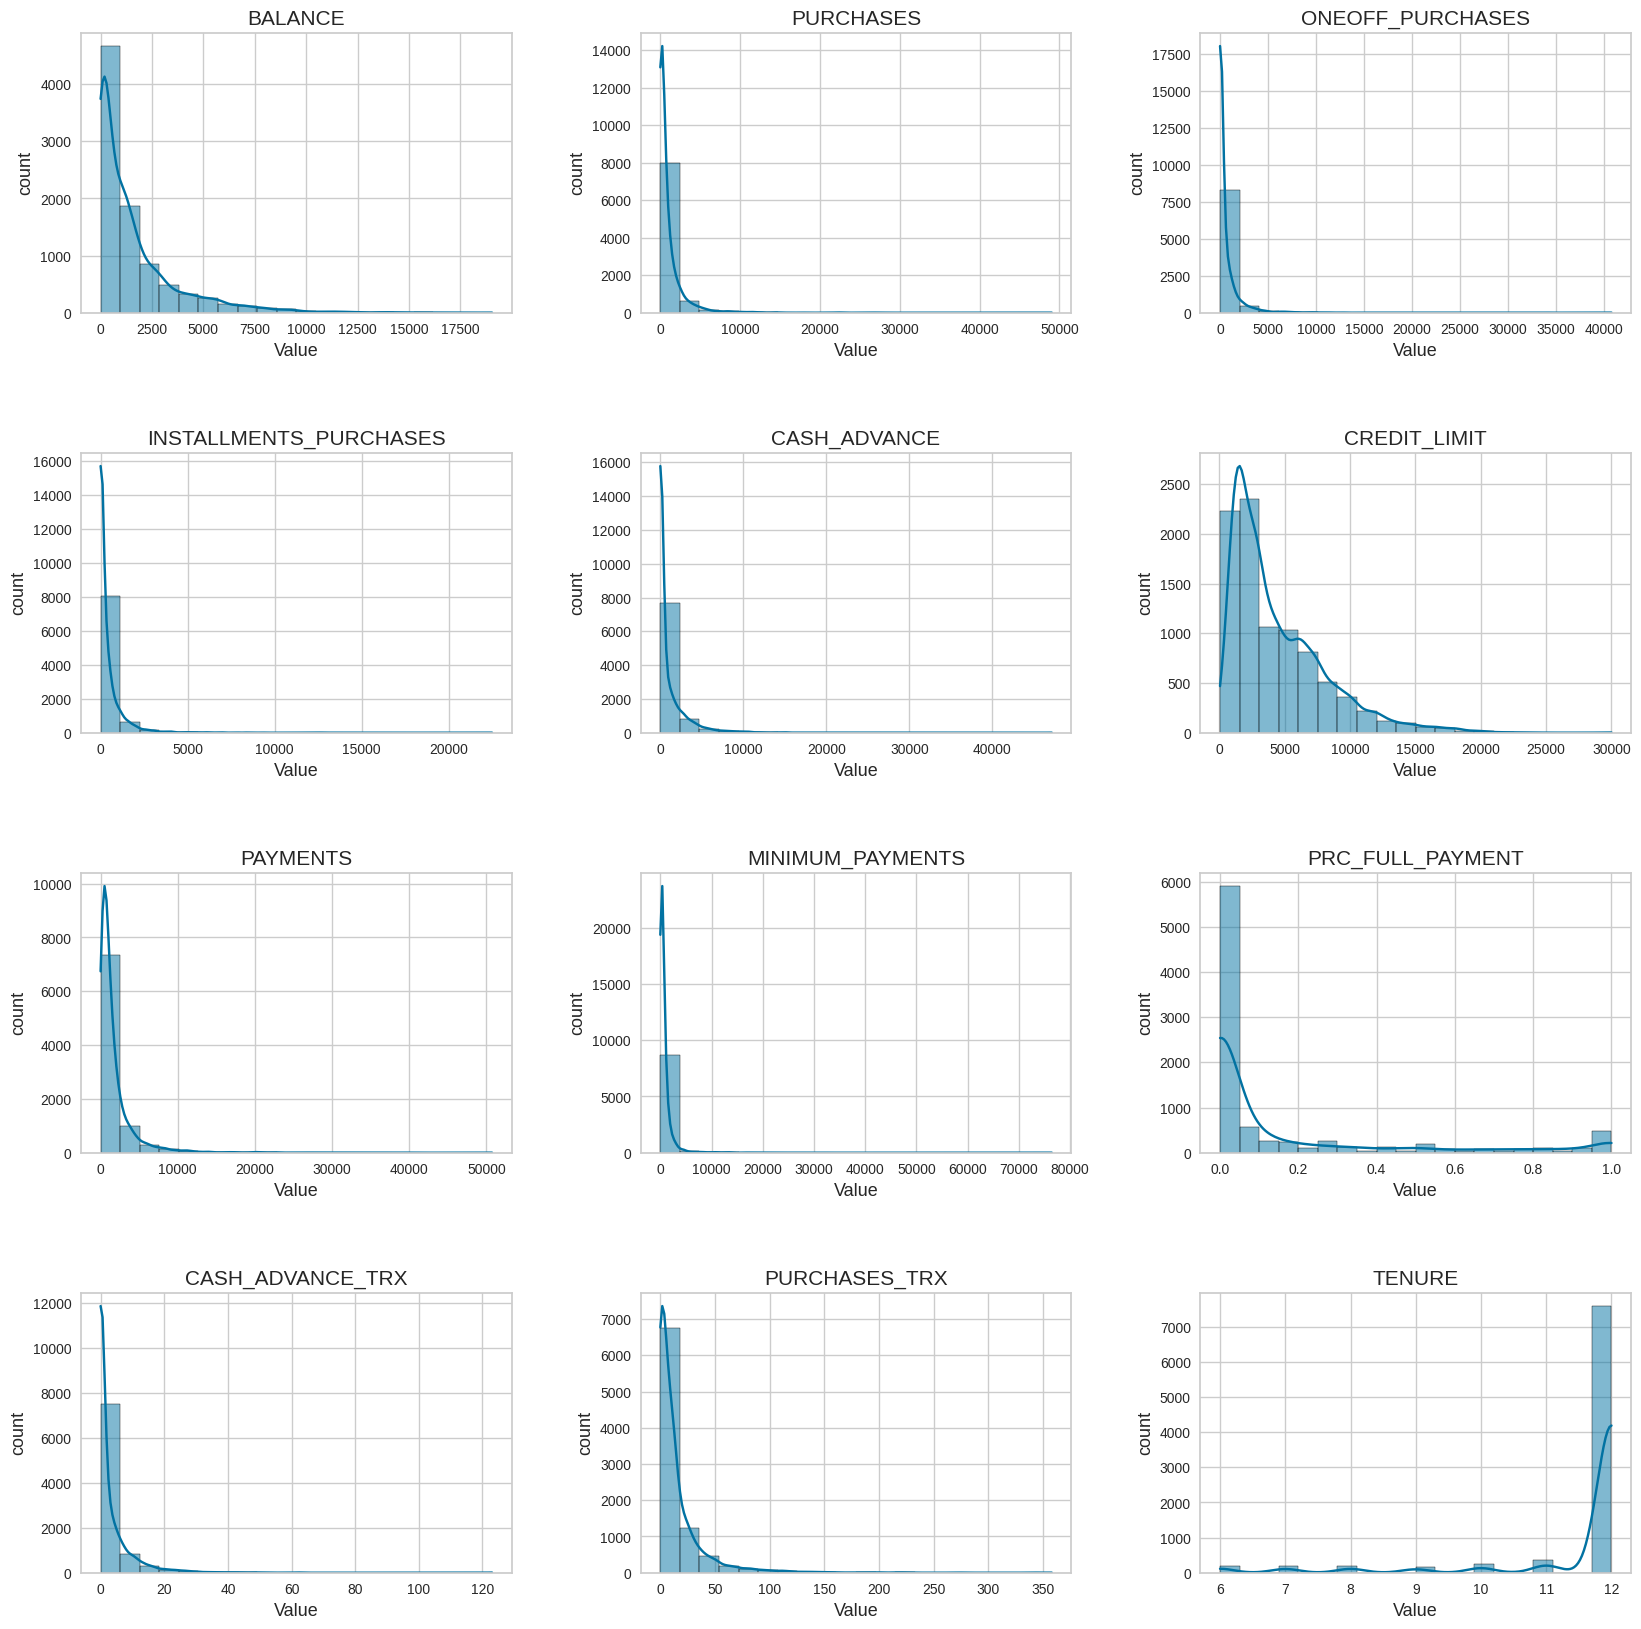

In [12]:
# cek skewness
var_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT',
           'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(4,3,i+1)
    plt.title(col, fontsize=15)
    plt.xlabel("Value", fontsize=13)
    plt.ylabel("count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=generalCC_df, x=col, bins=20, kde=True)

Semua fitur diatas terlihat memiliki distribusi yang tidak normal, distribusi data tersebut mengalamai skewness

In [13]:
generalCC_df[var_col] = np.log(generalCC_df[var_col] + 1)

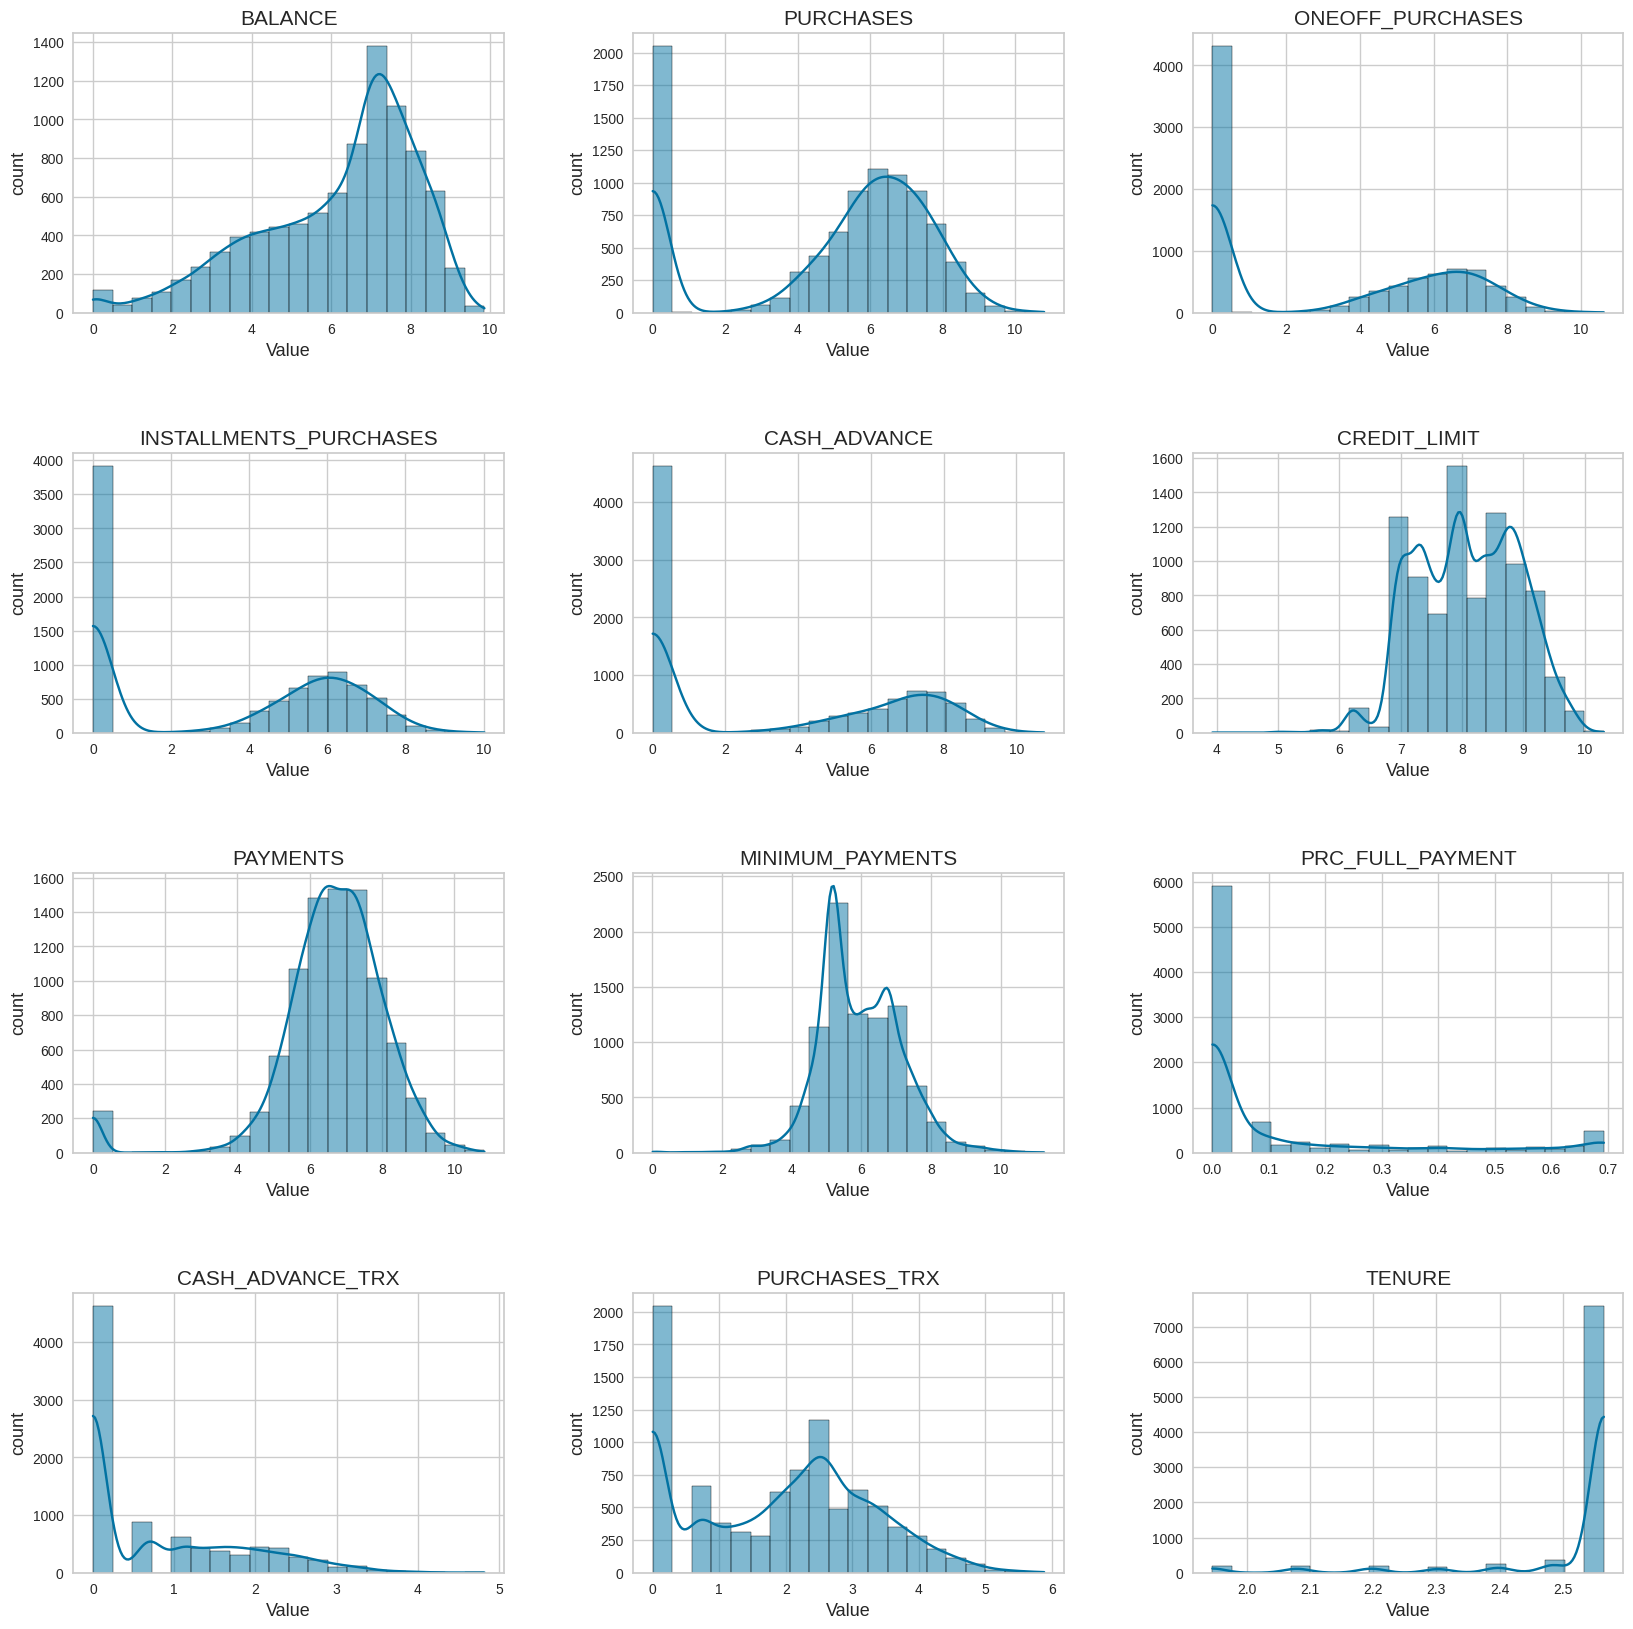

In [14]:
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(4,3,i+1)
    plt.title(col, fontsize=15)
    plt.xlabel("Value", fontsize=13)
    plt.ylabel("count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=generalCC_df, x=col, bins=20, kde=True)

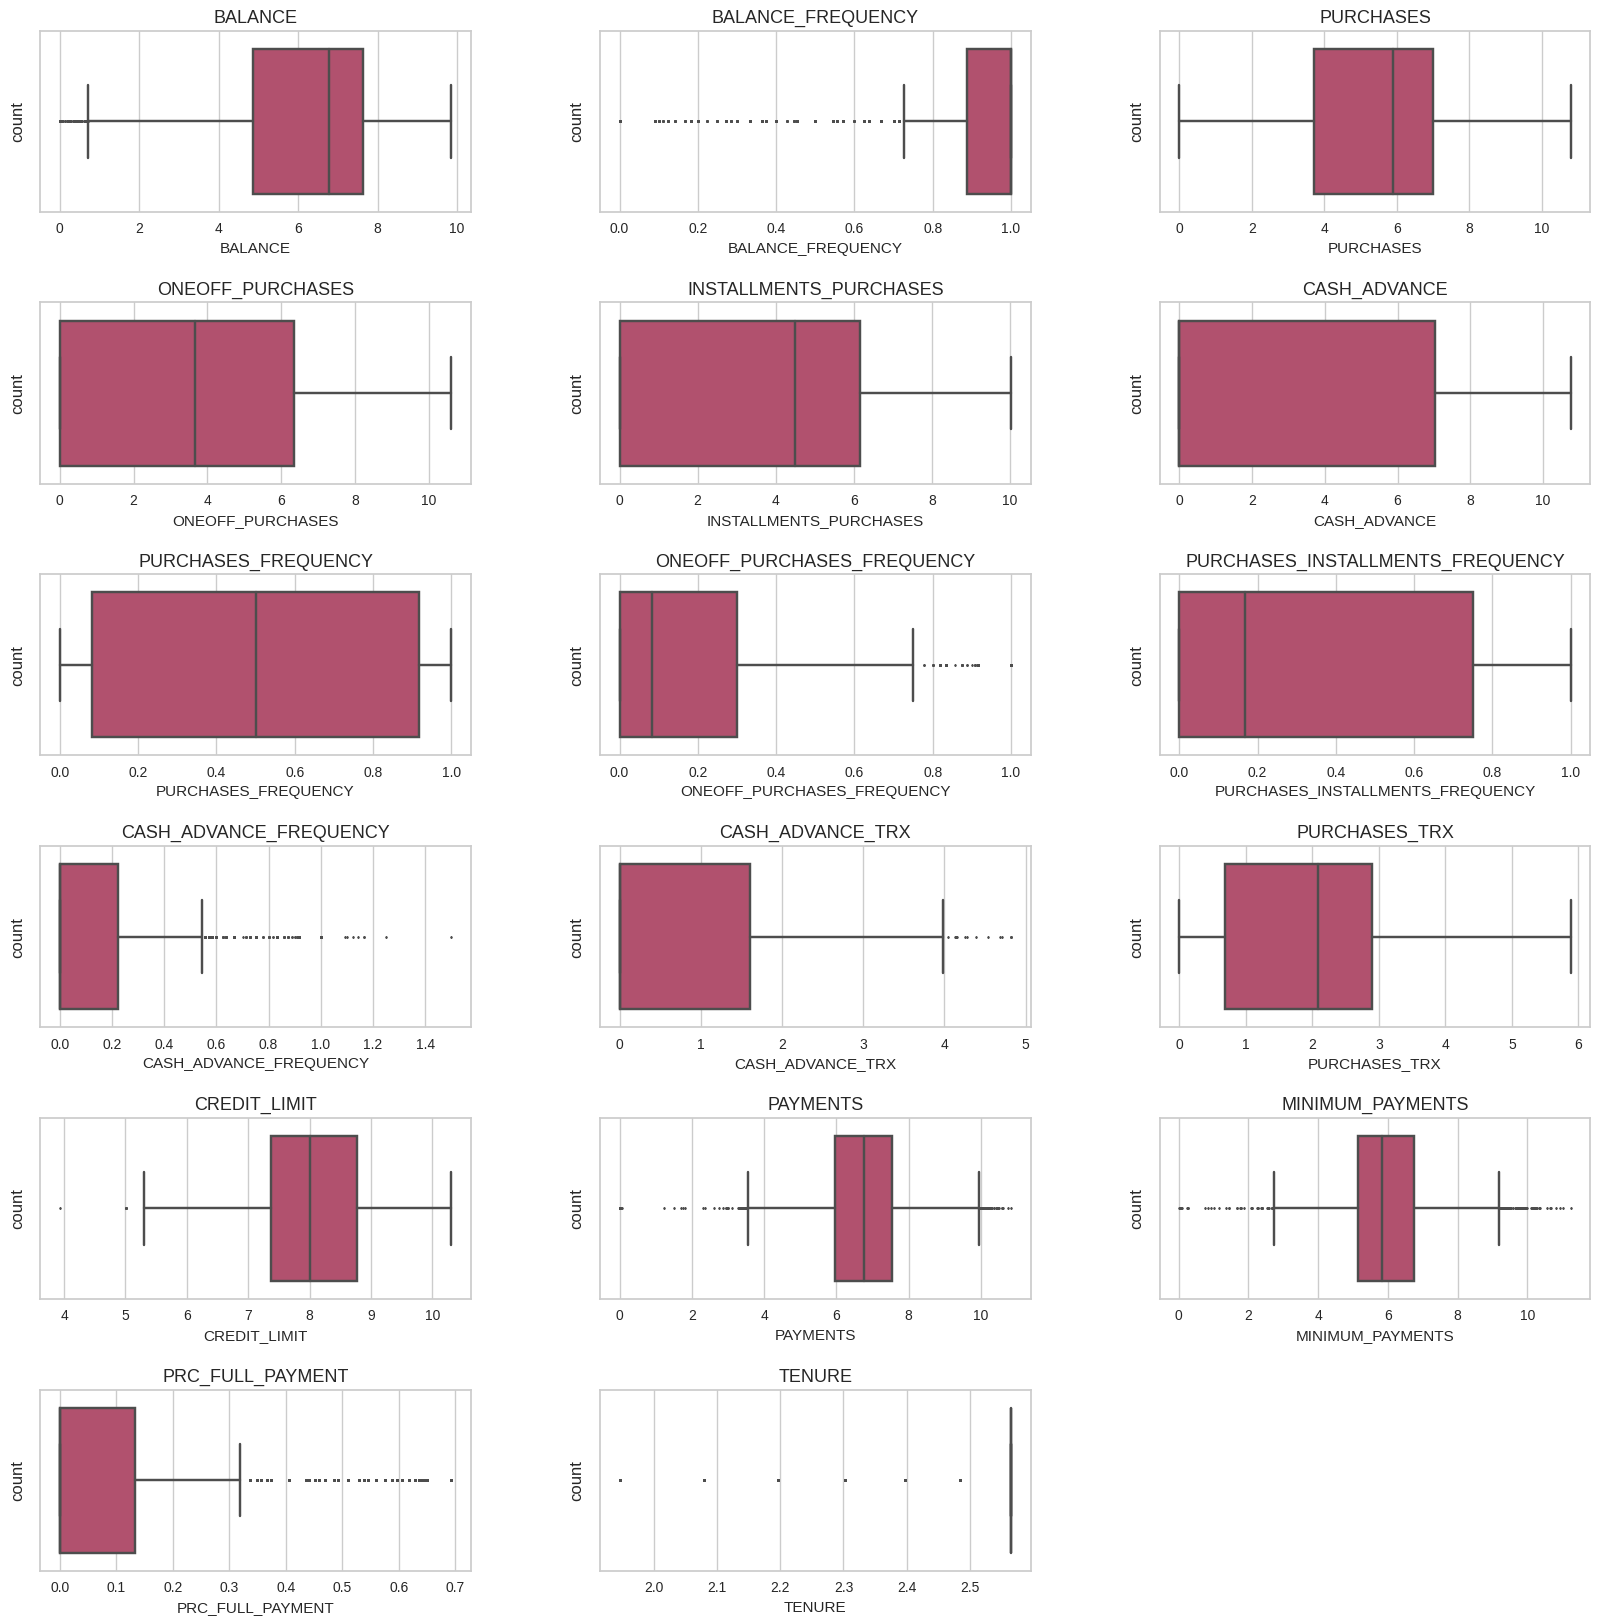

In [15]:
# cek outlier
from scipy.stats import skew

cols = generalCC_df.columns.to_list()
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(generalCC_df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=generalCC_df, x=col, palette='flare', fliersize=1)

Banyak fitur menunjukkan adanya nilai-nilai ekstrem, namun terlihat bahwa nilai-nilai tersebut merupakan outlier yang bersifat alami dan bukan disebabkan oleh kesalahan input atau pengukuran. Kemungkinan besar, beberapa nasabah atau pelanggan melakukan transaksi dengan jumlah yang sangat besar. Oleh karena itu, disarankan untuk membiarkannya saja agar tidak kehilangan beberapa informasi.

## 5. EDA

### 5.1 Credit Limit vs Balance based Tenure

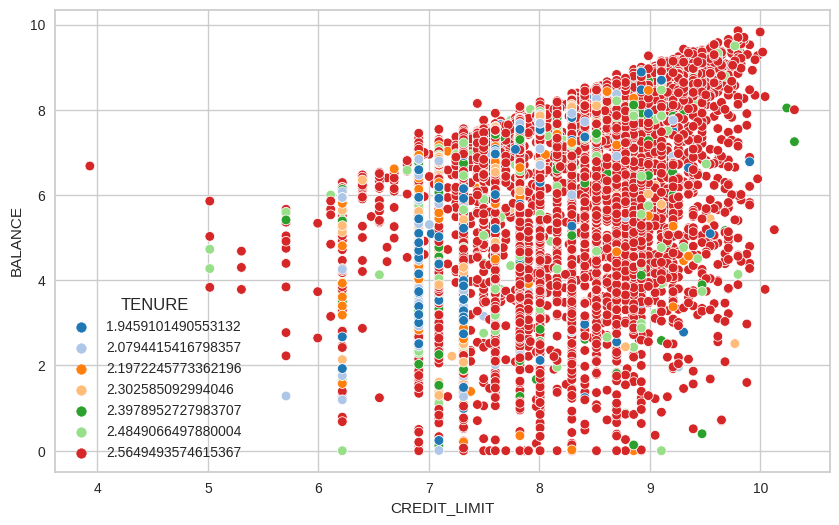

In [16]:
# Credit Limit vs. Balance based on Tenure
plt.figure(figsize=(10,6))
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=generalCC_df, hue='TENURE', palette='tab20')
plt.show()

<b>Insight:</b> Diagram scatterplot menunjukkan bahwa ketika nilai variabel meningkat, varian distribusinya juga meningkat, membentuk pola yang menyerupai sebuah kerucut. Selain itu, mayoritas pelanggan kartu kredit cenderung memfavoritkan tenor 12 bulan.

### 5.3 Purchases Amount vs. Total Transaction

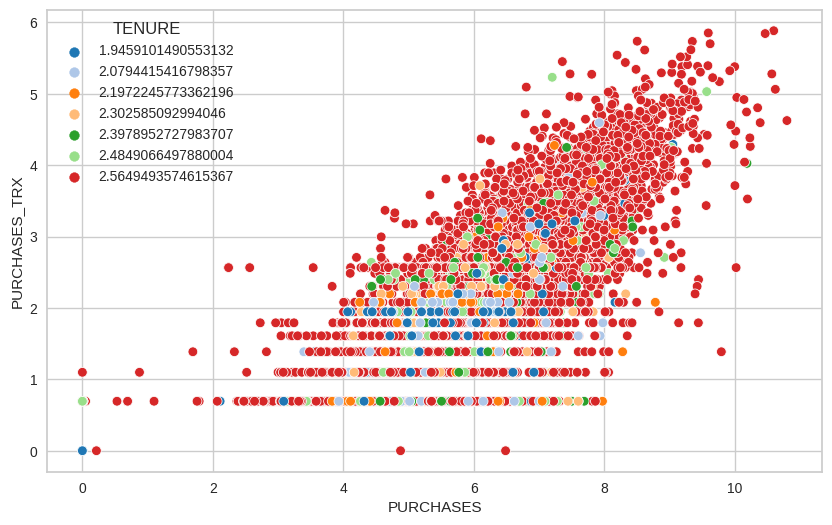

In [17]:
# Purchases Amount vs. Total Transaction
plt.figure(figsize=(10,6))
sns.scatterplot(x='PURCHASES', y='PURCHASES_TRX', data=generalCC_df, hue='TENURE', palette='tab20')
plt.show()

<b>Insight:</b> Dari grafik di atas dapat disimpulkan bahwa nasabah kartu kredit dengan masa tenor 12 bulan bersedia mengambil jumlah pembelian dan memiliki total transaksi pembelian yang lebih banyak dibandingkan dengan nasabah dengan masa tenor lainnya. 

Dimana nasabah lebih cenderung membayar utang dalam jangka waktu yang lama, guna menaikkan suku bunga. Selain itu, beberapa nasabah sengaja tidak melakukan transaksi sama sekali (0 pembelian dan transaksi) untuk mendapatkan limit kredit yang tinggi, yang berdampak pada peningkatan skor kredit dan rasio penggunaan kredit.

### 5.3 Credit Limit vs. Installment Purchases

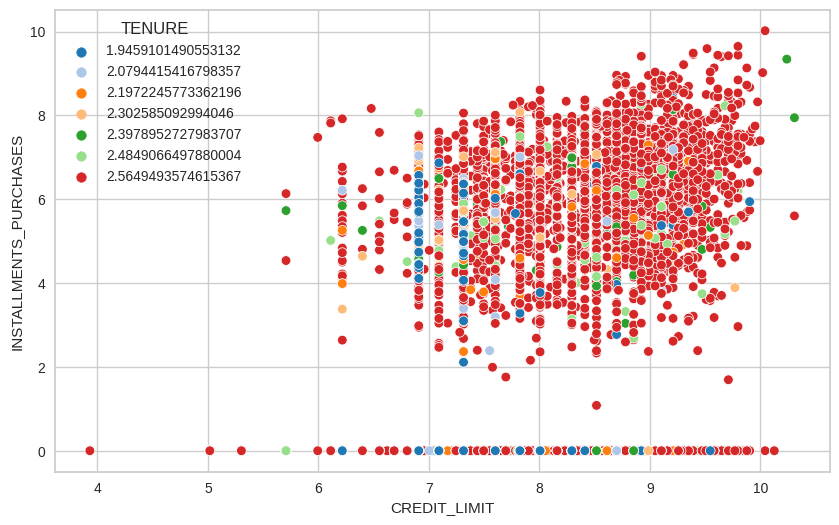

In [18]:
# Credit Limit vs. Installment Purchases
plt.figure(figsize=(10,6))
sns.scatterplot(x='CREDIT_LIMIT', y='INSTALLMENTS_PURCHASES', data=generalCC_df, hue='TENURE', palette='tab20')
plt.show()

<b>Insight:</b> Scatterplot tidak menunjukkan korelasi antara kedua variabel karena plot sebar menunjukkan pola acak.

### 5.4 Korelasi antar variabel

<Axes: >

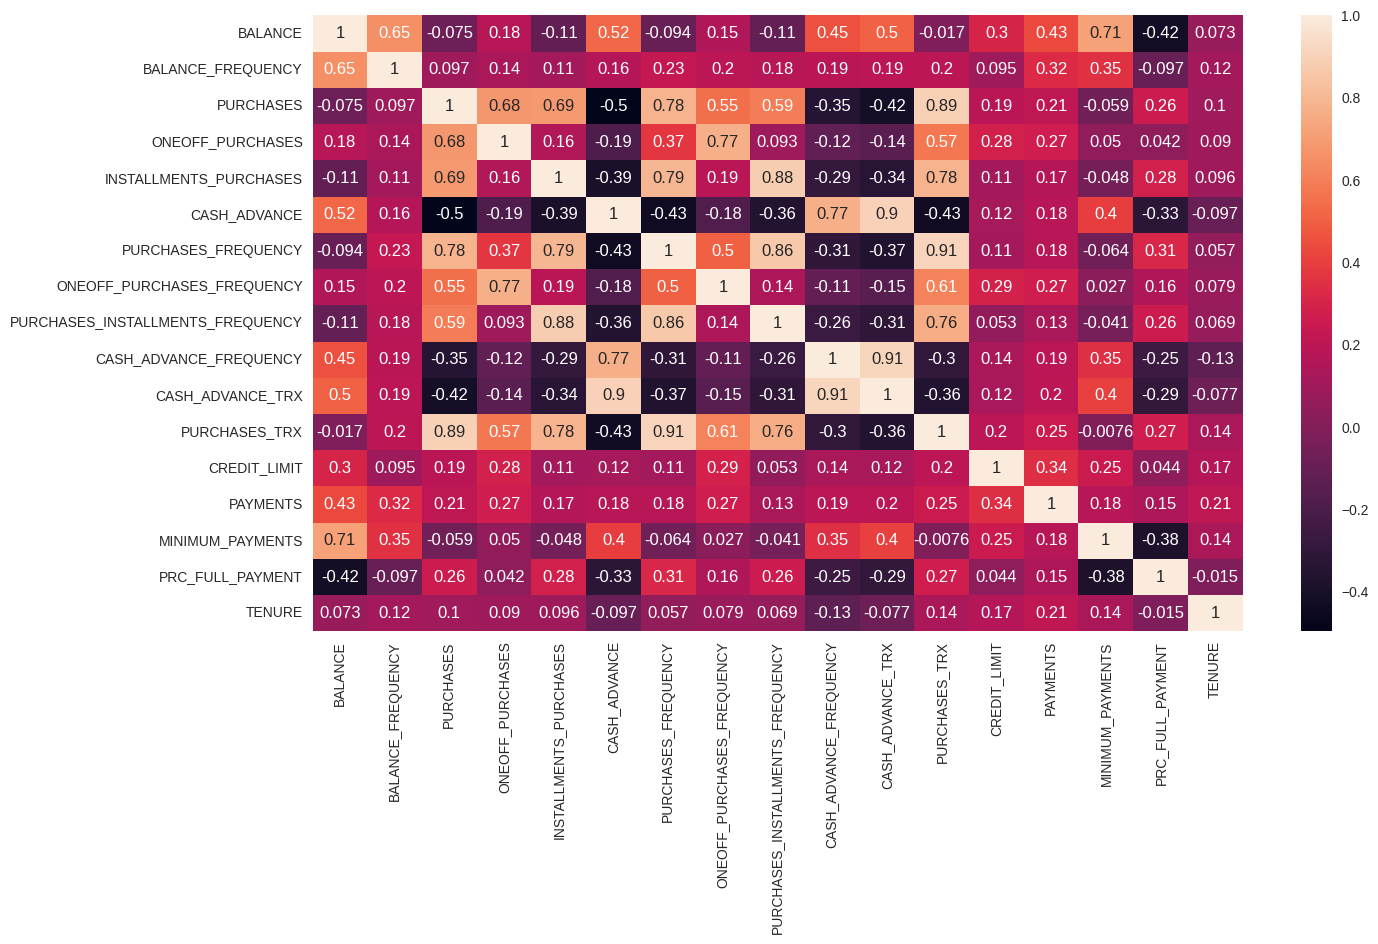

In [19]:
# cek korelasi
plt.figure(figsize=(15,8))
sns.heatmap(generalCC_df.corr(), annot=True)

Dari data yang terlihat pada grafik, dapat disimpulkan bahwa nasabah yang memilih tenor 12 bulan pada kartu kredit cenderung melakukan pembelian dalam jumlah yang lebih besar dan memiliki total transaksi yang lebih tinggi dibandingkan dengan nasabah yang memilih tenor lainnya. 

Para nasabah ini kemungkinan besar memiliki kecenderungan untuk membayar utang mereka dalam jangka waktu yang panjang, mungkin sebagai strategi untuk menghadapi kenaikan suku bunga. Selain itu, beberapa nasabah tampaknya memilih untuk tidak melakukan transaksi sama sekali (0 pembelian dan transaksi) mungkin dengan tujuan untuk meningkatkan batas kredit mereka. Hal ini dapat berdampak positif pada peningkatan skor kredit dan rasio penggunaan kredit.

## 6. Data Preprocessing

### 6.1 Feature Scaling

In [20]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_X = scaler.fit_transform(generalCC_df)

feat_cols = ['feature'+str(i) for i in range (scaled_X.shape[1])]
X = pd.DataFrame(scaled_X, columns=feat_cols)

In [21]:
X.shape

(8950, 17)

In [22]:
X.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16
8945,-1.225316,0.000000,-0.065060,-0.576007,0.191379,0.000000,0.600000,-0.277777,0.888888,0.000000,0.000000,-0.060773,-0.783504,-0.603844,-1.181235,3.036481,-0.619039
8946,-1.362447,0.000000,-0.056009,-0.576007,0.196246,0.000000,0.600000,-0.277777,0.888888,0.000000,0.000000,-0.060773,-0.783504,-0.707136,0.584042,0.000000,-0.619039
8947,-1.293875,-1.500005,-0.275934,-0.576007,0.077972,0.000000,0.399999,-0.277777,0.666667,0.000000,0.000000,-0.130930,-0.783504,-1.465873,-0.863150,1.671096,-0.619039
8948,-1.483062,-1.500005,-1.780990,-0.576007,-0.731443,0.516772,-0.600000,-0.277777,-0.222223,0.750002,0.682606,-0.946395,-1.277428,-1.734354,-1.101418,1.671096,-0.619039
8949,-0.307308,-3.000000,0.334111,0.524233,-0.731443,0.691567,0.200000,1.944447,-0.222223,1.500000,0.682606,0.500000,-0.653517,-1.621279,-0.821073,0.000000,-0.619039


   ### 6.2 Dimensionality Reduction with PCA

In [23]:
pca = PCA(n_components=2, random_state=24)
reduced_X = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'])

In [24]:
reduced_X.tail()

,PC1,PC2
8945,0.114729,2.232314
8946,-0.587475,-0.092209
8947,1.398540,0.776047
8948,1.564016,-0.764365
8949,1.659031,-0.520087


## 7. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

### 7.1 DeterminingThe Optimimum Value for "Eps"

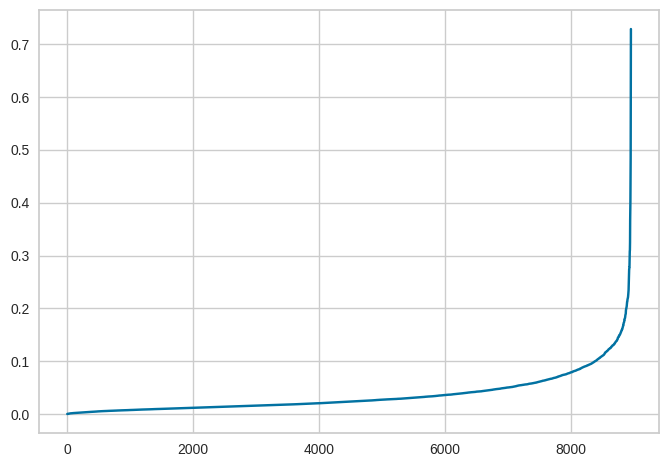

In [25]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(reduced_X)
distances, indices = nbrs.kneighbors(reduced_X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### 7.2 Modelling

In [26]:
dbscan = DBSCAN(eps=0.4, min_samples=3)
db_cluster = dbscan.fit_predict(reduced_X)

reduced_X['DBSCAN_Cluster'] = db_cluster

print("Jumlah Cluster pada DBSCAN: ", reduced_X['DBSCAN_Cluster'].unique())
reduced_X

Jumlah Cluster pada DBSCAN:  [ 0 -1  1]


,PC1,PC2,DBSCAN_Cluster
0,1.134932,-0.780122,0
1,-0.541318,-1.085768,0
2,-1.542938,0.712082,0
3,2.416091,-1.701444,0
4,-0.793470,-0.896190,0
...,...,...,...
8945,0.114729,2.232314,0
8946,-0.587475,-0.092209,0
8947,1.398540,0.776047,0
8948,1.564016,-0.764365,0


### 7.3 Visualisasi Hasil Clustering

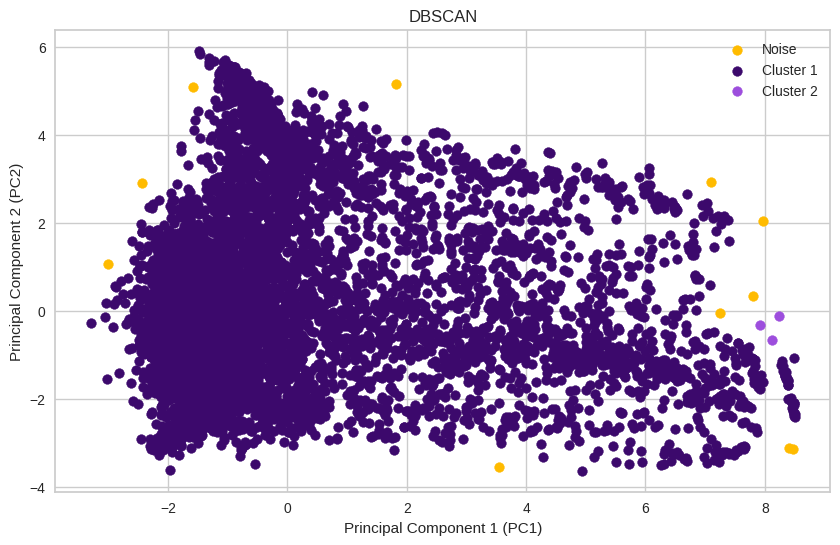

In [27]:
plt.figure(figsize=(10, 6))

plt.scatter(reduced_X[reduced_X['DBSCAN_Cluster'] == -1].loc[:, 'PC1'], reduced_X[reduced_X['DBSCAN_Cluster'] == -1].loc[:, 'PC2'], color='#FFBB00', label='Noise')
plt.scatter(reduced_X[reduced_X['DBSCAN_Cluster'] == 0].loc[:, 'PC1'], reduced_X[reduced_X['DBSCAN_Cluster'] == 0].loc[:, 'PC2'], color='#3C096C', label='Cluster 1')
plt.scatter(reduced_X[reduced_X['DBSCAN_Cluster'] == 1].loc[:, 'PC1'], reduced_X[reduced_X['DBSCAN_Cluster'] == 1].loc[:, 'PC2'], color='#9D4EDD', label='Cluster 2')

plt.title('DBSCAN')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

### 7.4 Evaluasi Model DBSCAN

In [28]:
no_noise_data = reduced_X[reduced_X['DBSCAN_Cluster'] != -1]

In [29]:
s_score = round(silhouette_score(no_noise_data.drop('DBSCAN_Cluster', axis=1), no_noise_data['DBSCAN_Cluster']), 3)
ch_score = round(calinski_harabasz_score(no_noise_data.drop('DBSCAN_Cluster', axis=1), no_noise_data['DBSCAN_Cluster']), 3)
db_score = round(davies_bouldin_score(no_noise_data.drop('DBSCAN_Cluster', axis=1), no_noise_data['DBSCAN_Cluster']), 3)

print(f"Silhouette Score: {s_score}")
print(f"Calinski Harabasz Score: {ch_score}")
print(f"Davies Bouldin Score: {db_score}")

Silhouette Score: 0.522
Calinski Harabasz Score: 22.603
Davies Bouldin Score: 0.34


In [30]:
reduced_X = reduced_X.drop('DBSCAN_Cluster', axis=1)

## 8. Hierachical Clustering (Agglomerative)

### 8.1 Elbow Method

Elbow Method digunakan untuk menentukan jumlah cluster yang tepat untuk algoritma Hierarchical Clustering.

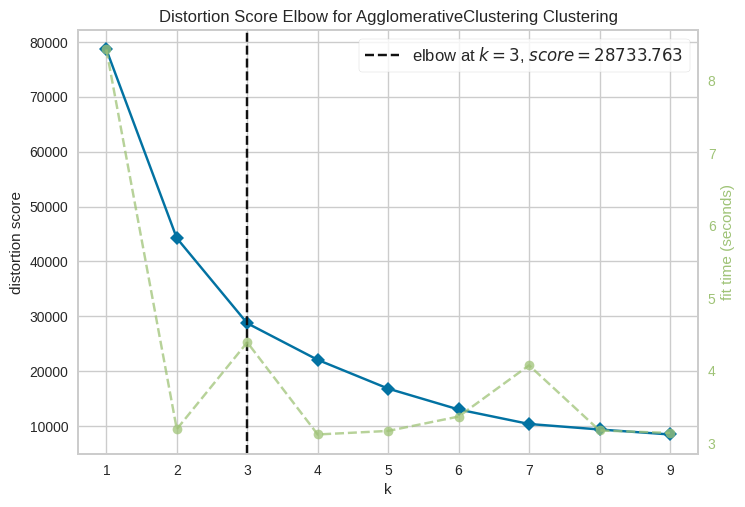

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Instantiate the clustering model and visualizer
model = AgglomerativeClustering()
hc_visualizer = KElbowVisualizer(model, k=(1,10))

hc_visualizer.fit(reduced_X) # Fit the data to the visualizer
hc_visualizer.show() # Finalize and render the figure

Berdasarkan plot metode Elblow cluster paling optimal adalah 3, sehingga akan dibuat 3 cluster saja.

### 8.2 Modelling

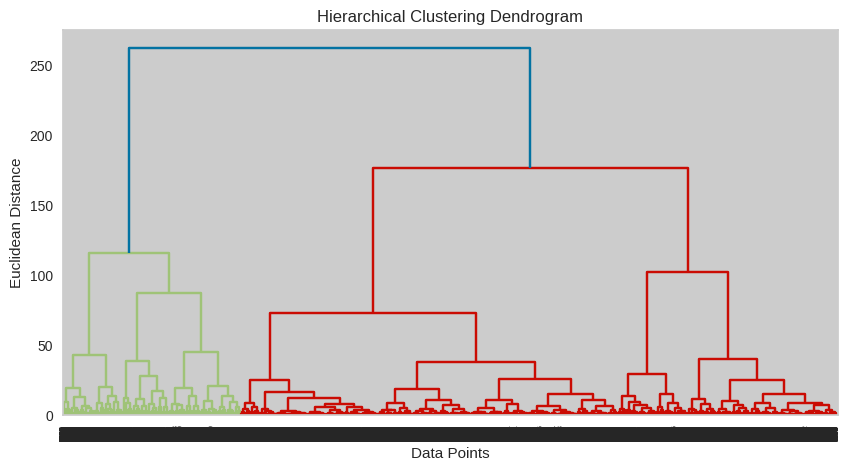

In [32]:
Z = linkage(reduced_X, 'ward')

# Plot the hierarchical clustering as a dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [33]:
# Apply Agglomerative Clustering
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_cluster = hc_model.fit_predict(reduced_X) + 1

# Add the cluster labels to your DataFrame
reduced_X['HC_Cluster'] = hc_cluster
print("Jumlah Cluster pada Hierarchical Clustering: ", reduced_X['HC_Cluster'].unique())
reduced_X

Jumlah Cluster pada Hierarchical Clustering:  [1 3 2]


,PC1,PC2,HC_Cluster
0,1.134932,-0.780122,1
1,-0.541318,-1.085768,3
2,-1.542938,0.712082,2
3,2.416091,-1.701444,1
4,-0.793470,-0.896190,3
...,...,...,...
8945,0.114729,2.232314,2
8946,-0.587475,-0.092209,3
8947,1.398540,0.776047,1
8948,1.564016,-0.764365,1


### 8.3 Visualisasi Hasil Clustering

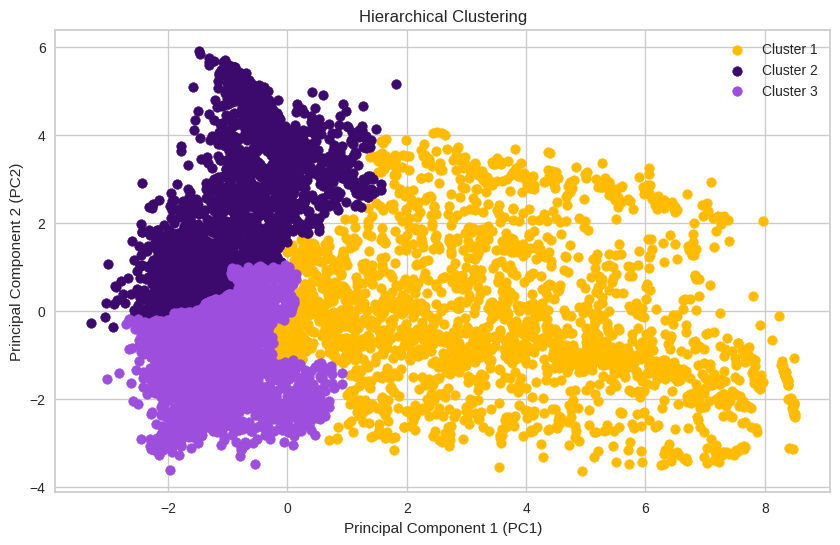

In [34]:
plt.figure(figsize=(10, 6))

plt.scatter(reduced_X[reduced_X['HC_Cluster'] == 1].loc[:, 'PC1'], reduced_X[reduced_X['HC_Cluster'] == 1].loc[:, 'PC2'], color='#FFBB00', label='Cluster 1')
plt.scatter(reduced_X[reduced_X['HC_Cluster'] == 2].loc[:, 'PC1'], reduced_X[reduced_X['HC_Cluster'] == 2].loc[:, 'PC2'], color='#3C096C', label='Cluster 2')
plt.scatter(reduced_X[reduced_X['HC_Cluster'] == 3].loc[:, 'PC1'], reduced_X[reduced_X['HC_Cluster'] == 3].loc[:, 'PC2'], color='#9D4EDD', label='Cluster 3')

plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

### 8.4 Evaluasi Model Hierarchical Clustering

In [35]:
s_score = round(silhouette_score(reduced_X.drop('HC_Cluster', axis=1), reduced_X['HC_Cluster']), 3)
ch_score = round(calinski_harabasz_score(reduced_X.drop('HC_Cluster', axis=1), reduced_X['HC_Cluster']), 3)
db_score = round(davies_bouldin_score(reduced_X.drop('HC_Cluster', axis=1), reduced_X['HC_Cluster']), 3)

print(f"Silhouette Score: {s_score}")
print(f"Calinski Harabasz Score: {ch_score}")
print(f"Davies Bouldin Score: {db_score}")

Silhouette Score: 0.4
Calinski Harabasz Score: 7767.154
Davies Bouldin Score: 0.827


In [36]:
reduced_X = reduced_X.drop('HC_Cluster', axis=1)

## 9. K-Means Clustering

### 9.1 Elblow Method
Elbow Method digunakan untuk menentukan **jumlah cluster yang tepat** untuk algoritma K-Means.

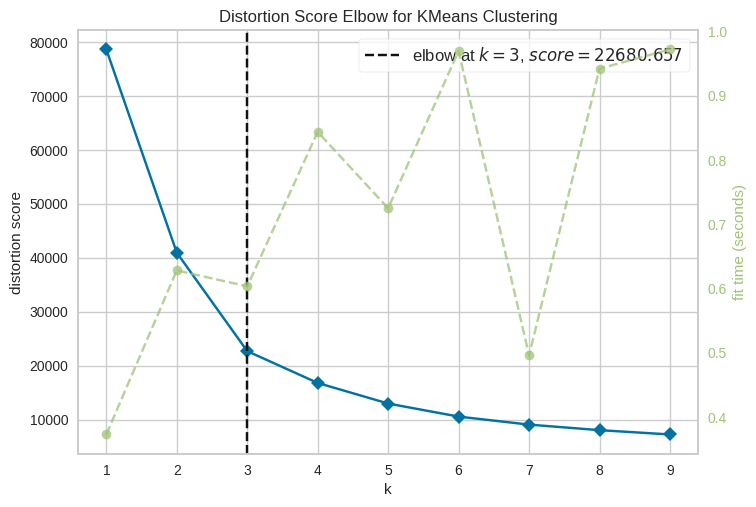

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(reduced_X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

Berdasarkan plot metode Elblow cluster paling optimal adalah 3, sehingga akan dibuat 3 cluster saja.

### 9.2 Modelling

In [38]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=24)
km_model_fit = kmeans.fit(reduced_X)

In [39]:
km_cluster = kmeans.predict(reduced_X) + 1

In [40]:
reduced_X['KMeans_Cluster'] = km_cluster
reduced_X

,PC1,PC2,KMeans_Cluster
0,1.134932,-0.780122,2
1,-0.541318,-1.085768,2
2,-1.542938,0.712082,2
3,2.416091,-1.701444,3
4,-0.793470,-0.896190,2
...,...,...,...
8945,0.114729,2.232314,1
8946,-0.587475,-0.092209,2
8947,1.398540,0.776047,1
8948,1.564016,-0.764365,2


### 9.3 Visualisasi Hasil Clustering

In [41]:
reduced_centers = km_model_fit.cluster_centers_
reduced_centers

array([[-0.07073976,  2.99418632],
       [-1.08054391, -0.71837759],
       [ 4.73992755, -0.47082885]])

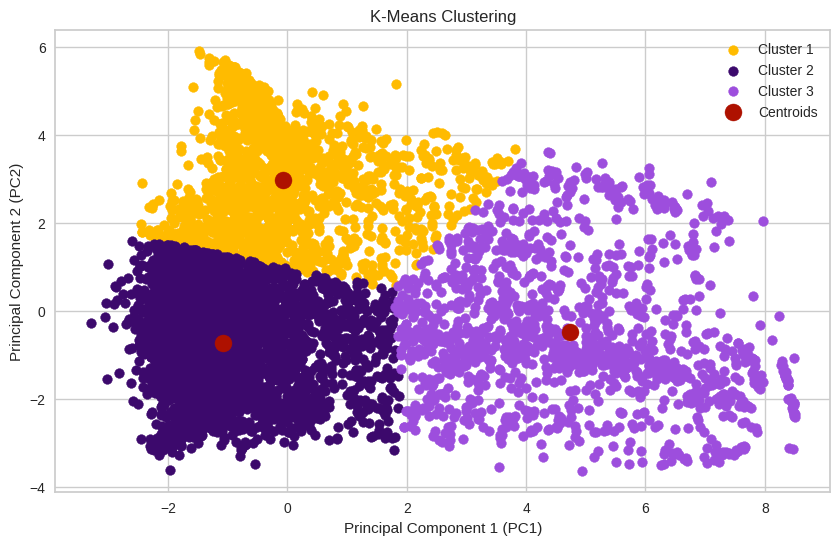

In [42]:
plt.figure(figsize=(10, 6))

plt.scatter(reduced_X[reduced_X['KMeans_Cluster'] == 1].loc[:, 'PC1'], reduced_X[reduced_X['KMeans_Cluster'] == 1].loc[:, 'PC2'], color='#FFBB00', label='Cluster 1')
plt.scatter(reduced_X[reduced_X['KMeans_Cluster'] == 2].loc[:, 'PC1'], reduced_X[reduced_X['KMeans_Cluster'] == 2].loc[:, 'PC2'], color='#3C096C', label='Cluster 2')
plt.scatter(reduced_X[reduced_X['KMeans_Cluster'] == 3].loc[:, 'PC1'], reduced_X[reduced_X['KMeans_Cluster'] == 3].loc[:, 'PC2'], color='#9D4EDD', label='Cluster 3')
#plt.scatter(reduced_X[reduced_X['KMeans_Cluster'] == 4].loc[:, 'PC1'], reduced_X[reduced_X['KMeans_Cluster'] == 4].loc[:, 'PC2'], color='#FFE270', label='Cluster 4')

plt.scatter(reduced_centers[:,0], reduced_centers[:, 1], color='#AE1100', marker='o', s=150, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

### 9.4 Evaluasi Model K-Means

In [43]:
s_score = round(silhouette_score(reduced_X.drop('KMeans_Cluster', axis=1), reduced_X['KMeans_Cluster']), 3)
ch_score = round(calinski_harabasz_score(reduced_X.drop('KMeans_Cluster', axis=1), reduced_X['KMeans_Cluster']), 3)
db_score = round(davies_bouldin_score(reduced_X.drop('KMeans_Cluster', axis=1), reduced_X['KMeans_Cluster']), 3)

print(f"Silhouette Score: {s_score}")
print(f"Calinski Harabasz Score: {ch_score}")
print(f"Davies Bouldin Score: {db_score}")

Silhouette Score: 0.529
Calinski Harabasz Score: 11034.014
Davies Bouldin Score: 0.668


## 10. Algorithm Analysis

* ***Davis-Bouldin Index*** merupakan metrik untuk mengevaluasi algoritma Clustering. Indeks ini menggambarkan rasio antara penyebaran Cluster dan pemisahan Cluster. Nilainya berkisar dari 0. Nilai 0 menunjukkan pengelompokan yang lebih baik.
* ***Silhouette Coefficient/Score*** merupakan metrik yang digunakan untuk menghitung kebaikan teknik Clustering. Nilainya berkisar antara -1 hingga 1. Makin besar nilainya makin baik. Nilai 1 menandakan Cluster terpisah satu sama lain dan dibedakan dengan jelas. Nilai 0 berarti Cluster tidak peduli/jarak antar cluster tidak signifikan. Nilai -1 berarti Cluster ditetapkan dengan cara yang salah.
* ***Indeks Calinski-Harabasz*** (juga dikenal sebagai *Variance Ratio Criterion*), merupakan rasio dari jumlah dispersi antar-Cluster dan dispersi antar-Cluster untuk semua Cluster. Makin besar nilainya makin baik hasil Clustering yang telah dilakukan.

Dari evaluasi 3 algoritma Clustering, diperoleh hasil sebagai berikut:
1. **DBSCAN**
* Silhouette Score: 0.522
* Calinski Harabasz Score: 22.603
* Davies Bouldin Score: 0.34

2. **Hierarchical Clustering**
* Silhouette Score: 0.4
* Calinski Harabasz Score: 7767.154
* Davies Bouldin Score: 0.827

3. **K-Means**
* Silhouette Score: 0.529
* Calinski Harabasz Score: 11034.014
* Davies Bouldin Score: 0.668


Dari hasil di atas, terlihat bahwa **algoritma K-Means memiliki performa/kinerja terbaik** dalam mengelompokkan nasabah kartu kredit ke dalam beberapa kelompok sesuai dengan perilaku nasabah.


## 11. Inference

In [44]:
generalCC_df['KMeans_Cluster'] = km_cluster

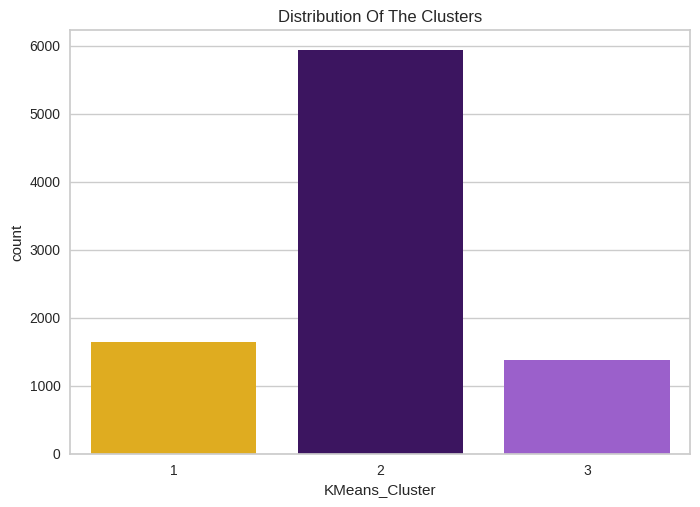

In [45]:
#Plotting countplot of clusters
colors = ['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
pl = sns.countplot(x=generalCC_df["KMeans_Cluster"], palette= colors)
pl.set_title("Distribution Of The Clusters")
plt.show()

###  11.1 Feature Importance

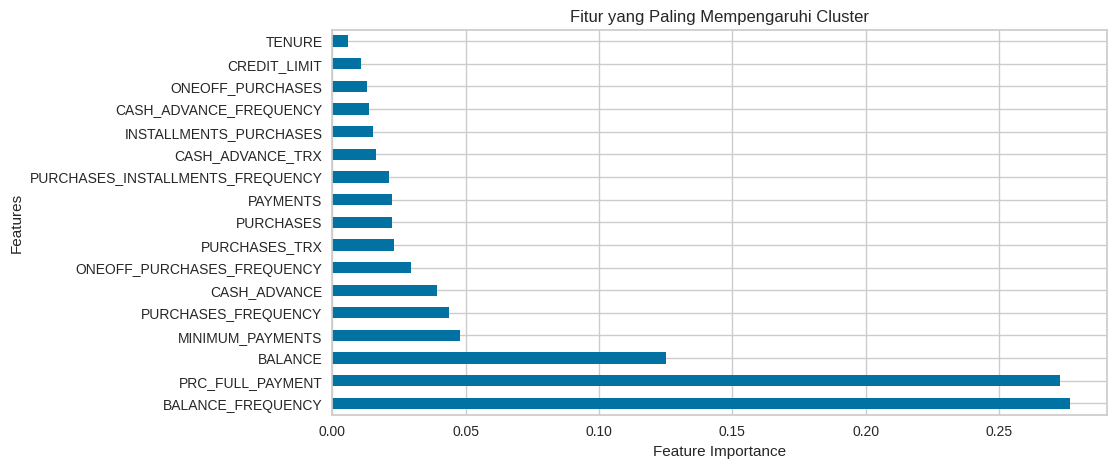

In [46]:
X = generalCC_df.drop(['KMeans_Cluster'], axis=1)
y = generalCC_df['KMeans_Cluster']

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

# Plot the graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
feat_importances.nlargest(20).plot(kind='barh')

plt.title("Fitur yang Paling Mempengaruhi Cluster")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

Terlihat bahwa fitur/kolom yang paling mempengaruhi pengelompokkan pada algoritma K-Means adalah
1. PRC_FULL_PAYMENT
2. BALANCE_FREQUENCY
3. BALANCE

In [1]:
###  11.2 Viusalization by Scatter Plot

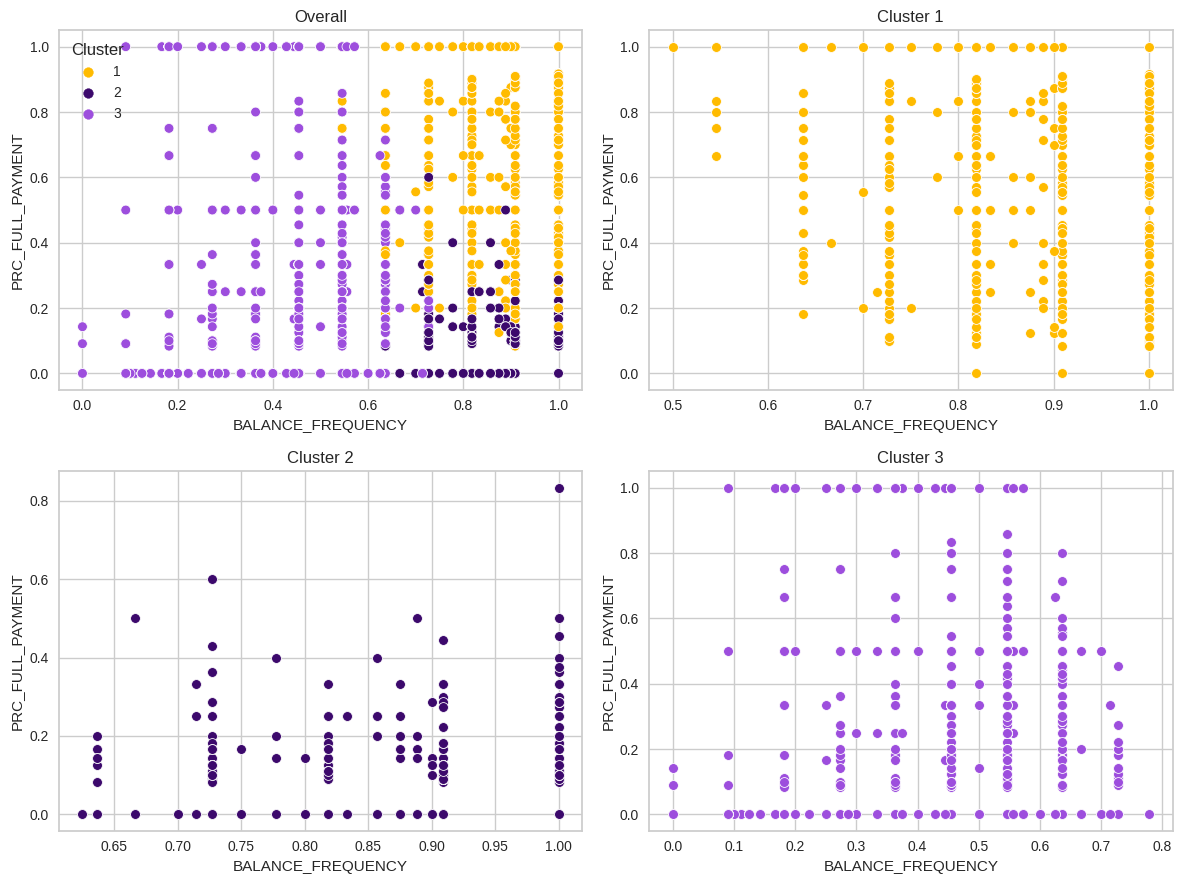

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Overall
sns.scatterplot(x='BALANCE_FREQUENCY', y='PRC_FULL_PAYMENT', hue='KMeans_Cluster', data=generalCC_df, palette=['#FFBB00', '#3C096C', '#9D4EDD'], s=50, ax=axes[0, 0])
axes[0, 0].set_title('Overall')
axes[0, 0].set_xlabel('BALANCE_FREQUENCY')
axes[0, 0].set_ylabel('PRC_FULL_PAYMENT')
axes[0, 0].legend(title='Cluster')

# Cluster 1
sns.scatterplot(x='BALANCE_FREQUENCY', y='PRC_FULL_PAYMENT', data=generalCC_df[generalCC_df['KMeans_Cluster'] == 1], color='#FFBB00', s=50, ax=axes[0, 1])
axes[0, 1].set_title('Cluster 1')
axes[0, 1].set_xlabel('BALANCE_FREQUENCY')
axes[0, 1].set_ylabel('PRC_FULL_PAYMENT')

# Cluster 2
sns.scatterplot(x='BALANCE_FREQUENCY', y='PRC_FULL_PAYMENT', data=generalCC_df[generalCC_df['KMeans_Cluster'] == 2], color='#3C096C', s=50, ax=axes[1, 0])
axes[1, 0].set_title('Cluster 2')
axes[1, 0].set_xlabel('BALANCE_FREQUENCY')
axes[1, 0].set_ylabel('PRC_FULL_PAYMENT')

# Cluster 3
sns.scatterplot(x='BALANCE_FREQUENCY', y='PRC_FULL_PAYMENT', data=generalCC_df[generalCC_df['KMeans_Cluster'] == 3], color='#9D4EDD', s=50, ax=axes[1, 1])
axes[1, 1].set_title('Cluster 3')
axes[1, 1].set_xlabel('BALANCE_FREQUENCY')
axes[1, 1].set_ylabel('PRC_FULL_PAYMENT')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## 12. Interpretation

In [47]:
generalCC_df[var_col] = np.exp(generalCC_df[var_col]) -1

In [48]:
# --- Calculationg Overall Mean from Current Data Frame ---
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = generalCC_df.describe().loc[['mean']].T

# --- Summarize Mean of Each Clusters ---
df_cluster_summary = generalCC_df.groupby('KMeans_Cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# --- Combining Both Data Frame ---
result_df = pd.concat([df_cluster_summary, df_profile_overall], axis=1)

result_df

,Metrics,1,2,3,Overall
BALANCE,mean,404.633388,2216.443430,140.688100,1564.474828
BALANCE_FREQUENCY,mean,0.941595,0.975454,0.377698,0.877271
PURCHASES,mean,2367.537395,780.390452,334.861249,1003.204834
ONEOFF_PURCHASES,mean,1434.727845,452.144924,191.602919,592.437371
INSTALLMENTS_PURCHASES,mean,933.247152,328.459381,143.766318,411.067645
CASH_ADVANCE,mean,124.356690,1339.474899,445.528150,978.871112
PURCHASES_FREQUENCY,mean,0.884176,0.428751,0.285724,0.490351
ONEOFF_PURCHASES_FREQUENCY,mean,0.409770,0.176298,0.067752,0.202458
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.682125,0.311672,0.212615,0.364437
CASH_ADVANCE_FREQUENCY,mean,0.017187,0.188550,0.045898,0.135144


Dari tabel di atas, maka tiap Cluster dapat disimpulkan sebagai berikut:

**Cluster 1 (*Active Spenders*)**
* Kelompok nasabah yang sering menggunakan kartu kredit dan membayar secara teratur
* Hal ini dapat dilihat dari rata-rata nilai "BALANCE_FREQUENCY" dan "PURCHASES" yang tinggi, tetapi rata-rata nilai "PRC_FULL PAYMENT" cukup tinggi (sekitar 0,60) yang berarti mereka juga sering melunasi/membayar secara penuh.

**Cluster 2 (*Debt Accumulators*)**
* Kelompok nasabah yang sering menggunakan kartu kredit dan jarang membayar/melunasi.
* Hal ini dapat dilihat dari rata-rata nilai "BALANCE_FREQUENCY" yang sangat tinggi, tetapi rata-rata nilai "PRC_FULL PAYMENT" yang rendah (hanya 0,02) yang berarti mereka sangat jarang melunasi/membayar secara penuh.

**Cluster 3 (*Low Spenders*)**
* Kelompok nasabah yang menggunakan kartu kredit mereka dengan hemat (sedikit).
* Hal ini dapat dilihat dari rata-rata nilai "BALANCE_FREQUENCY" dan "PURCHASE_FREQUENCY" yang cukup rendah.